In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import bokeh
import sklearn
import xgboost as xgb
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.mlab as mlab
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import bokeh
import sklearn
import xgboost as xgb
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.mlab as mlab
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import time 
import datetime
import collections
# from plotnine import *
import seaborn as sns
import scipy.stats as stats

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


import xgboost as xgb
import lightgbm as lgb

In [3]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


import xgboost as xgb
import lightgbm as lgb

In [4]:
zillow = pd.read_csv('/content/drive/MyDrive/SWE project/DataStorage/datawithLessVIF.csv')

In [5]:
zillow.shape

(69047, 25)

#Randomised search for hyperparameter tuning

In [6]:
Y = zillow['logerror']

In [7]:
X = zillow.copy()

In [8]:
X.drop('logerror',axis=1,inplace=True)  

In [9]:
X.shape

(69047, 24)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.02, random_state = 42)

n_estimators = [5,20,50,100] # number of trees in the random forest

max_features = ['auto', 'sqrt'] # number of features in consideration at every split

max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree

min_samples_split = [2, 6, 10] # minimum sample number to split a node

min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node

bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = 1)

In [11]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   1.4s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [12]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}  



Best Parameters: Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}  

Using best parameter from the last step of hyperparater tuning to do the feature selection algorithm via random forest

Best parameter here

Feature importance is the importance to the target variable

In [14]:
rf = rf = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 20, bootstrap=True) 

Features sorted by their score:
Initial MSE: 0.002736986969705557


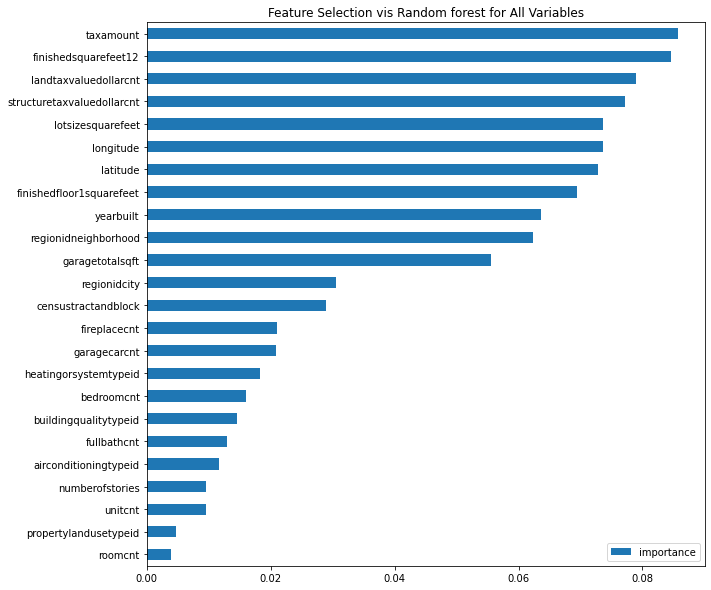

In [15]:
#rf = rf = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, min_samples_leaf= 3, max_features = 'sqrt', max_depth= 20, bootstrap=True) 
rf.fit(X, Y)
from sklearn.metrics import mean_squared_error 
y_pred = rf.predict(X)
print("Features sorted by their score:")
colName = X.columns
df_importance = pd.DataFrame(rf.feature_importances_,index=colName, columns=['importance'])
ax = df_importance.sort_values('importance').plot(kind='barh',figsize=(10,10))
ax.set_title('Feature Selection vis Random forest for All Variables')
# print(f'oob score is {rf.oob_score_}')
print(f"Initial MSE: {mean_squared_error(Y, y_pred)}")